In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mocpy import MOC
from astropy.io import votable

### Task 1 : Extract table in VOTable format.

In [2]:
limit = 100 # the table contain>100K lines
source = "table_II/7A/catalog"
url = f"https://vizier.cds.unistra.fr/viz-bin/votable?-source={source}&-out.max=10000"
vtable = votable.parse(url)

# get information
for info in vtable.iter_info():
    print(f"{info.name:<20} {info.value}")

protocol             ASU
request_date         2024-01-02T01:09:38
request              https://vizier.cds.unistra.fr//viz-bin/votable?-source=table_II/7A/catalog&-out.max=10000
contact              cds-question@unistra.fr
version              7.32.7
Error                Table or Catalog not found: table_II/7A/catalog
Warning              can't find table or catalogue: table_II/7A/catalog


Here, a regular table from astropy

In [3]:
from astropy.table import Table

limit = 100000 # the table contain>100K lines

source = "II/7A/catalog"
url = f"https://vizier.cds.unistra.fr/viz-bin/votable?-source={source}&-out.max={limit}"

#table = Table.read(url)
table = Table.read(url, table_id="II/7A/catalog")
print(table[:5])

# information on columns
#print(table["RAJ2000"].info())


recno JP11     LID     n_LID   U    ...  N    H    ref     _RA       _DE   
                              mag   ... mag  mag           deg       deg   
----- ---- ----------- ----- ------ ... --- ------ ---- --------- ---------
    1    1  0.00000444           -- ...  --  6.640 8130  40.17863   1.19868
    2    1  0.00000444           -- ...  --  6.640 8130  40.17863   1.19868
    3    3  0.00004030       15.340 ...  --  4.100 8057 282.60583   0.79167
    4    4  0.00004064       13.570 ...  --  2.390 8057 284.38983   0.45552
    5    5  0.00101522           -- ...  --  6.280 8140 102.08778   1.21897


### Task 2 : Build an astropy table with an added HEALPix column in the order that you choose (eg: order 10) You can use the astropy-healpix library to compute the HEALPix number from ra,dec.

In [4]:
from astropy_healpix import HEALPix
from astropy.coordinates import SkyCoord, ICRS, Angle
from astropy import units as u

order = 4 # We choose any order
nside = 2**order
table = Table.read(url, table_id="II/7A/catalog")

# Compute the HEALPix index and add it as a new column

hp = HEALPix(nside=nside, order = 'nested', frame = ICRS())
coord = SkyCoord(table["_RA"], table["_DE"], frame= 'icrs', unit = 'deg')
list_ipix = hp.skycoord_to_healpix(coord)


table['Healpix'] = list_ipix
print("Lenth of the ipix list is = ", len(list_ipix))
print(table[:5])

Lenth of the ipix list is =  5943
recno JP11     LID     n_LID   U    ...   H    ref     _RA       _DE    Healpix
                              mag   ...  mag           deg       deg           
----- ---- ----------- ----- ------ ... ------ ---- --------- --------- -------
    1    1  0.00000444           -- ...  6.640 8130  40.17863   1.19868    1111
    2    1  0.00000444           -- ...  6.640 8130  40.17863   1.19868    1111
    3    3  0.00004030       15.340 ...  4.100 8057 282.60583   0.79167    1894
    4    4  0.00004064       13.570 ...  2.390 8057 284.38983   0.45552    1894
    5    5  0.00101522           -- ...  6.280 8140 102.08778   1.21897    1388


C:\Users\DB\anaconda3\lib\site-packages\astropy_healpix\core.py:415: RuntimeWarning: invalid value encountered in lonlat_to_healpix_nested
  healpix_index, dx, dy = func(lon, lat, nside)


### Task 3: Create a simple HEALPix pixelation from the HEALPix column (so a kind of MOC but in a unique order). Your code must contains a text serialization. Example of HEALPix pixelation serialization: 6/17407 18090 18773 19456

In [5]:
from astropy_healpix import HEALPix

order = 6 #We can put any order here.
nside = 2**order

hp = HEALPix(nside=nside, order = 'nested', frame = ICRS())
coord = SkyCoord(table["_RA"], table["_DE"], frame= 'icrs', unit = 'deg')
list_ipix = hp.skycoord_to_healpix(coord)
unique_list = (np.unique(np.sort(np.abs(list_ipix))))
string_list = " ".join(map(str, unique_list))

with open('Serialised_text.txt', 'w') as f:
    f.write(f"{order}/")
    f.writelines(''.join(string_list))
    
print(f"{order}/", string_list)

6/ 1 4 15 22 48 49 63 75 78 79 90 120 128 137 155 161 177 215 254 290 309 320 322 325 333 336 337 338 339 340 341 342 343 348 349 350 351 353 359 373 375 377 401 411 419 428 429 451 454 455 456 457 458 459 460 461 462 463 464 467 472 473 474 475 476 477 478 481 483 485 487 496 497 546 560 666 684 689 725 737 744 753 770 771 798 811 826 846 894 903 915 917 975 998 1015 1018 1020 1024 1032 1033 1035 1040 1042 1043 1045 1058 1060 1073 1074 1075 1079 1094 1111 1113 1114 1115 1136 1143 1169 1171 1175 1178 1196 1198 1207 1231 1276 1285 1286 1293 1337 1341 1354 1360 1397 1399 1408 1412 1422 1427 1428 1429 1430 1438 1447 1448 1459 1460 1504 1521 1535 1539 1545 1558 1591 1618 1633 1696 1704 1714 1719 1727 1728 1729 1748 1749 1759 1766 1769 1770 1790 1796 1808 1826 1855 1875 1885 1888 1896 1922 1963 1965 1986 2017 2025 2089 2106 2127 2150 2188 2190 2202 2209 2282 2317 2336 2340 2360 2381 2409 2460 2467 2472 2476 2489 2515 2520 2566 2591 2593 2597 2619 2623 2660 2664 2690 2694 2697 2732 2737 2749

### Task 4: Extend the code to build a real MOC (with HEALPix in different order) and apply it to the HEALPix column. Your code must contains a text serialization. Todo that, you can (but you can follow an other algorithm) have a recursive approach that manages cells in a structure (made of dictionaries, lists, objects) and functions/methods that manages node operations (like to add or delete a node). Then you iterate the HEALPix values and feed one by one the MOC tree.

##### Here, I print the print the order and the ideal number of ipix cells it should contain.

In [6]:
def details(order):
    no_ipix_cells = 12*4**(order)
    print(f"Order {order} has {no_ipix_cells} number of ipix cells")
    
details(5)

Order 5 has 12288 number of ipix cells


##### Now, I build a function which gives me the list of ipix cells of the current order. It also generates a list, called "main_list" which will be used in subsequent functions like "My_MOC" which, for example, is defined to generate the MOC.

In [7]:
def current_order(order):
    nside = 2**order
    hp = HEALPix(nside=nside, order = 'nested', frame = ICRS())
    coord = SkyCoord(table["_RA"], table["_DE"], frame= 'icrs', unit = 'deg')
    ipix = hp.skycoord_to_healpix(coord)
    main_list = np.sort(np.unique(np.abs((ipix))))
    string_list = " ".join(map(str, main_list))
    
    return main_list

order = 2
print(f"{order}/", current_order(order))

2/ [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191]


##### Now, I build a function which gives me the list of ipix cells of the higher order to the one I want.

In [8]:
def increase_order(order, main_list):
    
    nside = 2**order
    hp = HEALPix(nside=nside, order = 'nested', frame = ICRS())
    coord = SkyCoord(table["_RA"], table["_DE"], frame= 'icrs', unit = 'deg')
    ipix = hp.skycoord_to_healpix(coord)
    main_list = np.sort(np.unique(np.abs((ipix))))
    string_list = " ".join(map(str, main_list))
    
    combined_child_ipix = []
    for ipix in main_list:
        child_ipix = [(ipix << 2), (ipix << 2) + 1, (ipix << 2) + 2, (ipix << 2) + 3]
        combined_child_ipix.extend(child_ipix)
    string_inc = " ".join(map(str, combined_child_ipix))
    
    return string_inc #This represents the list of ipix cells of the higher order in string format.


order = 3
main_ipix = current_order(order)
print(f"{order+1}/", increase_order(order, main_ipix))

4/ 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291

##### Now I build the final function, which will construct the desired MOC Tree

In [9]:
def My_MOC(order, main_list):
    
    main_list = current_order(order)
    
    MOC_Tree_child = []
    MOC_Tree_parent = []
    MOC_Tree_root = []

    if order == 0:
        MOC_Tree_root.extend(main_list)
        print(f'{order}/', MOC_Tree_root)
    else:
        j = 0
        while j < 12*(4)**(order):              

            ideal_siblings = [(j), (j+1), (j+2), (j+3)]

            if all(item in main_list for item in ideal_siblings):
                # All siblings are present
                # Replace with parent in the ideal siblings list, which is the first item in every 4 items

                MOC_Tree_parent.append(j>>2)

            else:
                if j in main_list:
                    MOC_Tree_child.append(j)

                if j+1 in main_list:
                    MOC_Tree_child.append(j+1)

                if j+2 in main_list:
                    MOC_Tree_child.append(j+2)

                if j+3 in main_list:
                    MOC_Tree_child.append(j+3)

            j = j + 4

        unique_MOC_Tree_c = np.unique(MOC_Tree_child)
        unique_MOC_Tree_p = np.unique(MOC_Tree_parent)

        #convert list into string

        parents_string = " ".join(map(str, unique_MOC_Tree_p))
        children_string = " ".join(map(str, unique_MOC_Tree_c))
        final_string = f"{order-1}/{parents_string}\n{order}/{children_string}"

        return final_string

In [10]:
# We can use the function My_MOC to see what the serialisation looks like.

order = 3
main_list = current_order(order)
moc_ser = My_MOC(order, main_list)
print(moc_ser)

2/0 1 3 4 5 6 7 8 9 10 11 12 14 16 17 19 20 21 22 24 26 31 33 34 35 36 37 38 42 43 45 47 48 49 50 51 52 53 54 55 56 57 59 60 61 63 64 66 67 68 69 71 72 73 74 75 76 77 78 80 81 82 83 84 85 86 88 89 91 92 93 94 95 97 98 100 101 102 103 105 106 108 109 110 111 112 113 115 117 118 119 120 121 122 124 125 126 127 129 130 132 133 139 140 142 143 144 145 146 147 148 150 152 153 154 155 156 157 158 162 163 165 166 167 168 169 170 172 173 175 181 182 183 186 191
3/8 10 11 52 53 54 60 63 72 73 74 94 95 101 103 108 110 111 112 113 115 116 117 118 120 121 122 128 129 131 156 157 158 161 162 163 164 165 167 177 178 179 185 186 232 233 235 249 250 251 261 262 263 281 283 316 317 318 348 350 351 360 362 363 384 386 387 397 398 416 418 419 428 429 430 456 457 459 464 466 467 492 493 495 513 515 524 527 537 538 539 540 541 543 544 545 547 548 549 550 552 554 555 564 566 567 596 597 598 604 605 636 637 638 640 642 643 644 645 646 657 658 659 684 685 687 696 698 699 705 710 711 713 716 718 720 721 723 73

###  Task 5 : Illustrate the result in a Jupyter notebook with plots (matplotlib) or in Aladin (module ipyaladin). In the notebook, use your serialization and mocpy (especially for functions like plots or moc-operation only available in mocpy).

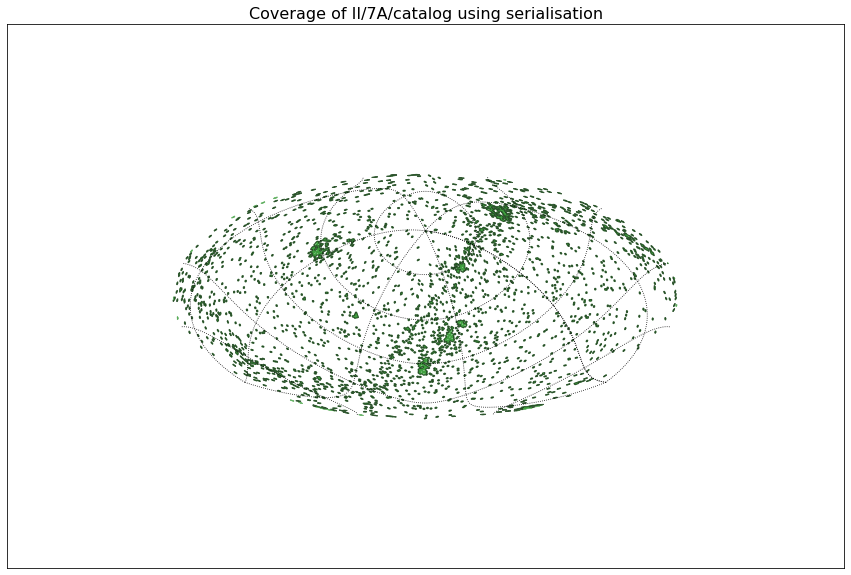

In [11]:
from mocpy import MOC
import matplotlib.pyplot as plt

order = 7
main_list = current_order(order)

moc = MOC.from_str(My_MOC(order, main_list)) # Here, I use my serialisation

fig = plt.figure(111, figsize=(15, 10))
wcs = moc.wcs(fig, coordsys="icrs", rotation=Angle(0, u.degree), projection="AIT")
ax = fig.add_subplot(1, 1, 1, projection=wcs)
moc.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
moc.border(ax=ax, wcs=wcs, alpha=0.5, color="black")
plt.title(f"Coverage of {source} using serialisation", fontsize=16)
plt.grid(color="black", linestyle="dotted")

plt.savefig(r"Coverage_using_serialisation.png")
plt.show()


### Note: to test, you can use the mocpy library and check if the results are similar. You can also plot the result using astropy (see the mocpy doc.). The mocpy library is able to check some inconsistencies like overlapping elements.

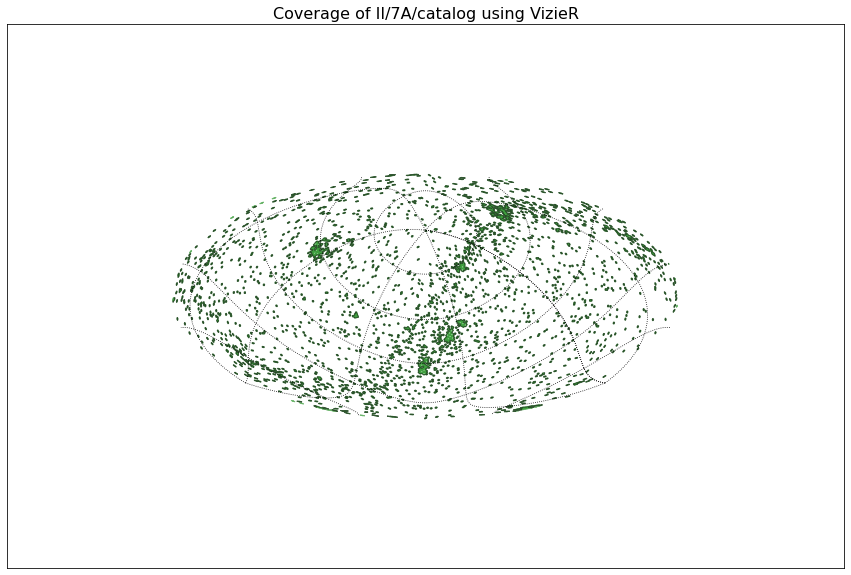

In [12]:
from mocpy import MOC
import matplotlib.pyplot as plt

order = 7
nside = 2**order

moc = MOC.from_vizier_table(table_id = "II/7A/catalog", nside=nside) # Here, I use vizier data


fig = plt.figure(111, figsize=(15, 10))
wcs = moc.wcs(fig, coordsys="icrs", rotation=Angle(0, u.degree), projection="AIT")
ax = fig.add_subplot(1, 1, 1, projection=wcs)
moc.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
moc.border(ax=ax, wcs=wcs, alpha=0.5, color="black")
plt.title(f"Coverage of {source} using VizieR", fontsize=16)
plt.grid(color="black", linestyle="dotted")

# Save the figure before showing it
plt.savefig(r"Coverage_using_VizieR.png")

# Show the plot
plt.show()
